## Exercise-04
## Index No - 190621M
## Name - K. Thanushan

### Question 1.

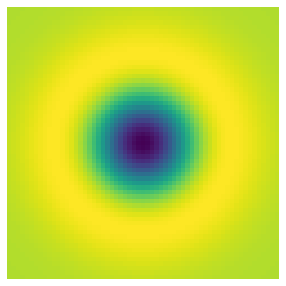

In [22]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma

X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))

fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.imshow(log)
ax.axis('off')
plt.show()

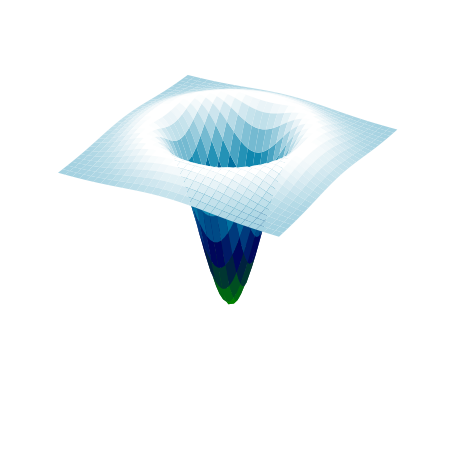

In [20]:
#3D view of the Laplacian of the Guassian
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, log, cmap = cm.ocean, linewidth = 0, antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
plt.axis('off')
plt.show()

### Question 2.

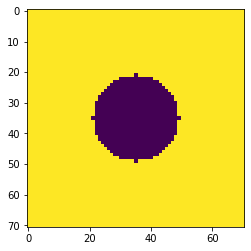

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw = w//2
hh = h//2
f = np.ones((h,w), dtype = np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 #14
f *= X**2 + Y**2 > r**2
plt.imshow(f)

(35, 35, 5)
10


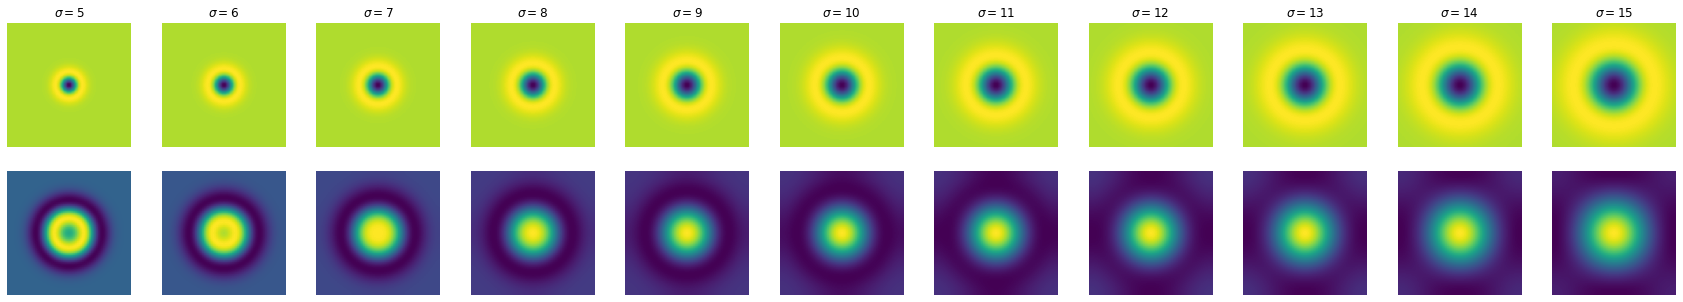

In [26]:
s = 11
fig, ax = plt.subplots(2, s, figsize = (30,5))
scale_space = np.empty((h,w,s), dtype = np.float32)
sigmas = np.arange(5,16,1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+ Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].set_title('$\sigma = {}$'.format(sigma))
    ax[0, i].axis('off')
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])

The scale space extremum occurs when $\sigma = 10$. This is because $r = \sqrt{2}*10 = 14.14$ which is approximately equal to the radius of the circle. Therefore, the scale space extremum occurs when $\sigma = 10$. 

### Question 3.

(-0.5, 1599.5, 639.5, -0.5)

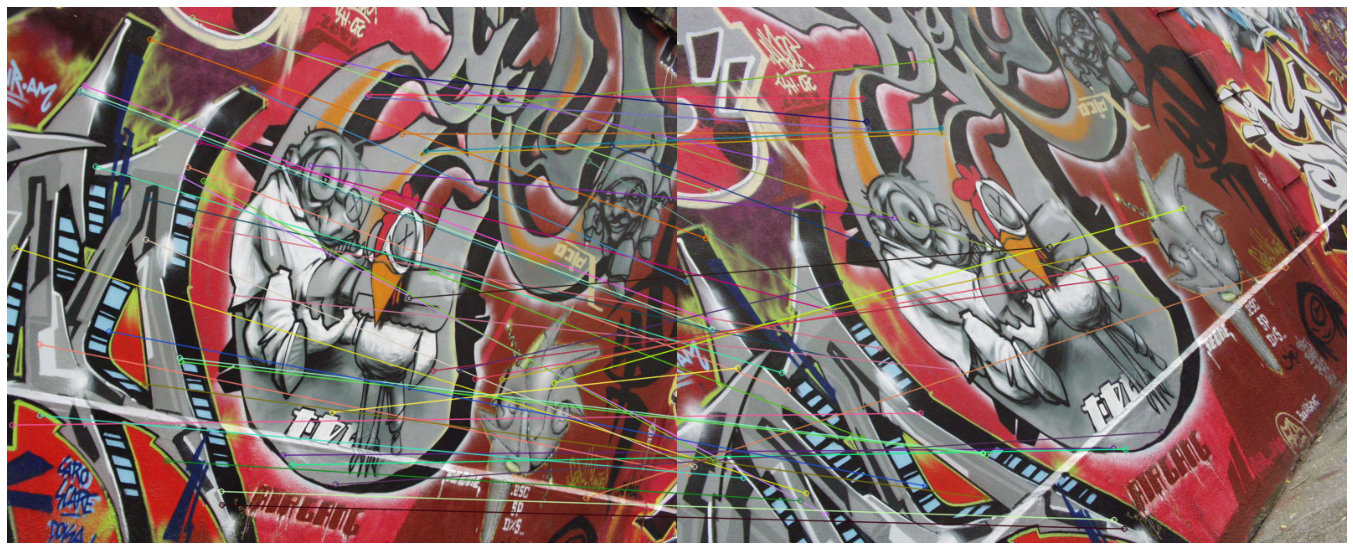

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Image_1 = cv.imread('img3.ppm')
Image_2 = cv.imread('img4.ppm')
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(Image_1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(Image_2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
matched_image = cv.drawMatches(Image_1, keypoints_1, Image_2, keypoints_2, matches[:50], Image_2, flags=2)

Imageplot_1 = cv.cvtColor(matched_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize = (24,12))
ax.imshow(Imageplot_1, vmin = 0, vmax = 255)
ax.axis('off')


### Question 4.

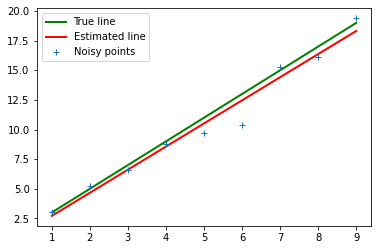

In [28]:
import numpy as np
import matplotlib.pyplot as plt
#Least squares line fitting
m = 2 # Line equation : y = m*x + c. m is the slope. c is the intercept .
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape) #o[=1] = 20
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B = np.linalg.pinv((X.T)@X)@(X.T)@y
mstar = B[0]
cstar = B[1]
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label = 'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color = 'r', linewidth = 2, label = 'Estimated line')
plt.plot(x, y, '+', label = 'Noisy points')
plt.legend()

### Question 5.

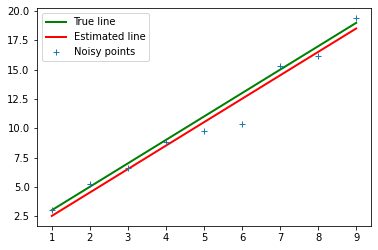

In [32]:
#Total Least squares line fitting
import numpy as np
import matplotlib.pyplot as plt
m = 2 # Line equation : y = m*x + c. m is the slope. c is the intercept .
c = 1
x = np.arange (1 ,10 , 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape) #o[=1] = 20
y = m*x + c + noise + o
n = len(x)

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V  = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar  = -a/b 
cstar  = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label = 'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color = 'r', linewidth = 2, label = 'Estimated line')
plt.plot(x, y, '+', label = 'Noisy points')
plt.legend(loc = 'best')